NameError: name 'plot_circles' is not defined

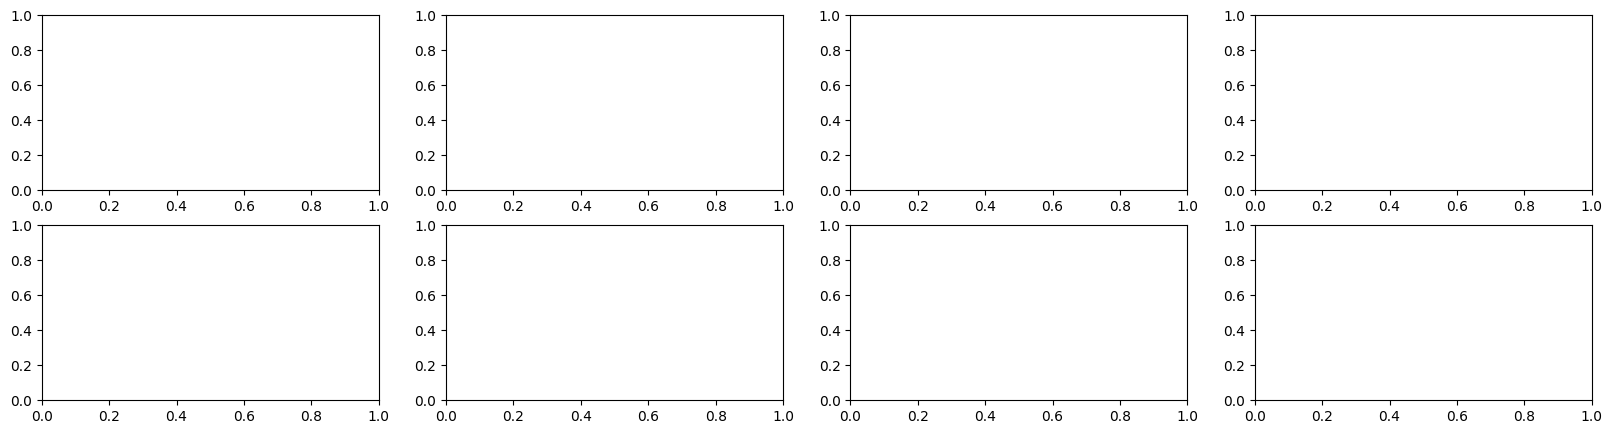

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(20, 5))  # 2x8 grid of plots

functions = [plot_diagonals, plot_circles, plot_lines, plot_xs]
vertical = [True, False]

for f_idx, f in enumerate(functions):
    for v_idx, v in enumerate(vertical):
        img = f(v)
        axes[v_idx, f_idx].imshow(img)

# for i in range(2):
#     for j in range(8):
#         axs[i, j].imshow(img)

plt.tight_layout()
plt.axis('off')
plt.show()

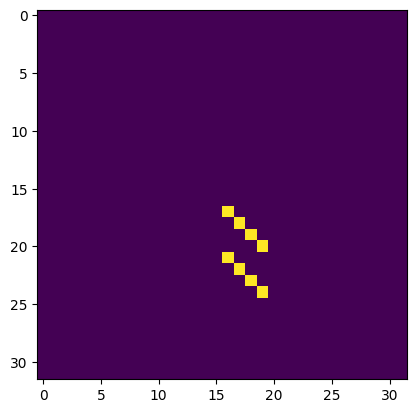

In [26]:
def plot_diagonals(vertical=False):

    # Create a blank 32x32 image
    image = np.zeros((32, 32))
    
    start_row = np.random.randint(0, 25)  # Changed the max value to ensure space for both lines
    start_col = np.random.randint(0, 29)  # Changed to accommodate line length

    line_length = 4

    # Draw the two horizontal lines
    for i in range(line_length):
        image[start_row + i, start_col + i] = 1
        image[start_row + i, start_col + i + 4] = 1

    if not vertical:
        image = image.T

    return image

plt.figure()

img = plot_diagonals(False)
plt.imshow(img)



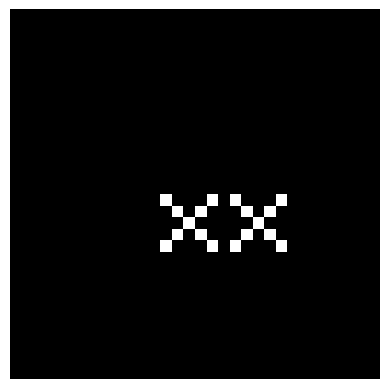

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_xs(vertical=True):
    image_x = np.zeros((32, 32))

    # Define the starting point for the first X
    start_row_x1 = np.random.randint(0, 26)
    start_col_x1 = np.random.randint(0, 14)  # Ensure there's room for two Xs

    # Define the starting point for the second X
    start_row_x2 = start_row_x1
    start_col_x2 = start_col_x1 + 6

    # Define the length of the X
    x_length = 5

    # Draw the two Xs
    for i in range(x_length):
        # First X
        image_x[start_row_x1 + i, start_col_x1 + i] = 1
        image_x[start_row_x1 + i, start_col_x1 + x_length - 1 - i] = 1
        
        # Second X
        image_x[start_row_x2 + i, start_col_x2 + i] = 1
        image_x[start_row_x2 + i, start_col_x2 + x_length - 1 - i] = 1

    if not vertical:
        image_x = image_x.T

    return image_x

plt.figure()
image = plot_xs(True)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


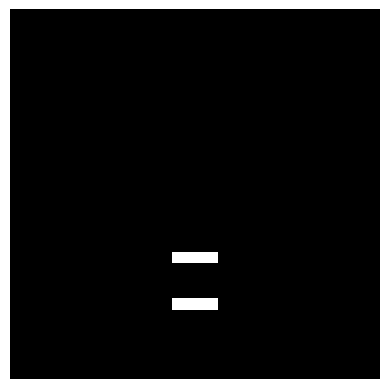

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_l
# Create a blank 32x32 image
image = np.zeros((32, 32))

# Define the starting point for the first horizontal line
start_row = np.random.randint(0, 25)  # Changed the max value to ensure space for both lines
start_col = np.random.randint(0, 29)  # Changed to accommodate line length

# Define the length of the horizontal lines
line_length = 4

# Draw the two horizontal lines
for i in range(line_length):
    image[start_row, start_col + i] = 1
    image[start_row + 4, start_col + i] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


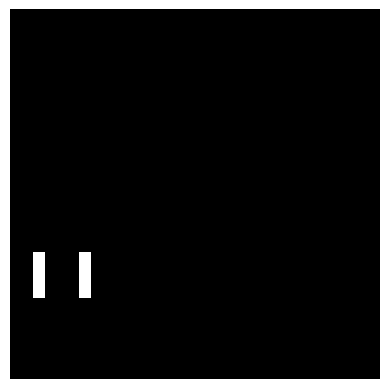

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vertical = True 

# Create a blank 32x32 image
image = np.zeros((32, 32))

# Define the starting point for the first horizontal line
start_row = np.random.randint(0, 25)  # Changed the max value to ensure space for both lines
start_col = np.random.randint(0, 29)  # Changed to accommodate line length

# Define the length of the horizontal lines
line_length = 4

# Draw the two horizontal lines
for i in range(line_length):

    if vertical:
        image[start_row + i, start_col ] = 1
        image[start_row + i, start_col + 4] = 1
    else:
        image[start_row, start_col + i ] = 1
        image[start_row + 4, start_col + i] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


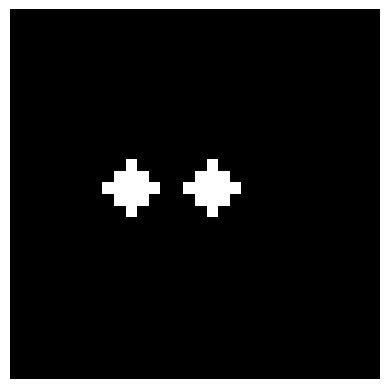

In [ ]:
# Reduce the radius for the circles to make them smaller
small_radius = 2
# Define the center and radius for the first circle
center_row_c1 = np.random.randint(10, 22)
center_col_c1 = np.random.randint(10, 14)
radius_c1 = 5

# Define the center and radius for the second circle
center_row_c2 = center_row_c1
center_col_c2 = center_col_c1 + 7


def draw_circle(image, center_row, center_col, radius, value=1):
    """Draw a circle on the given image."""
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            if (r - center_row)**2 + (c - center_col)**2 <= radius**2:
                image[r, c] = value
    return image

# Create a blank 32x32 image for the smaller circles
image_small_circles = np.zeros((32, 32))

# Draw the two smaller circles
draw_circle(image_small_circles, center_row_c1, center_col_c1, small_radius)
draw_circle(image_small_circles, center_row_c2, center_col_c2, small_radius)

# Display the image
plt.imshow(image_small_circles, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
def draw_stimuli_random_orientation(image, stimuli, orientation="horizontal"):
    """Draw the stimuli on a random location of the given image based on the selected orientation."""
    max_width = image.shape[1]
    max_height = image.shape[0]
    
    # Calculate total width or height required for the stimuli
    if orientation == "horizontal":
        total_space = sum([params['length'] if stimulus != "circle" else 2*params['radius'] for stimulus, params in stimuli])
        total_space += len(stimuli) * 2 - 2  # Add spaces between stimuli
        if total_space > max_width:
            raise ValueError("Not enough space to draw the stimuli horizontally.")
        start_col = np.random.randint(0, max_width - total_space + 1)
        col_offset = 0
        row_offset = np.random.randint(0, max_height - 10)  # Ensure there's some vertical space
    else:  # vertical
        total_space = sum([params['length'] if stimulus != "circle" else 2*params['radius'] for stimulus, params in stimuli])
        total_space += len(stimuli) * 2 - 2  # Add spaces between stimuli
        if total_space > max_height:
            raise ValueError("Not enough space to draw the stimuli vertically.")
        start_row = np.random.randint(0, max_height - total_space + 1)
        row_offset = 0
        col_offset = np.random.randint(0, max_width - 10)  # Ensure there's some horizontal space

    for stimulus, params in stimuli:
        if stimulus == "diagonal":
            draw_diagonal_line(image, params['start_row'] + row_offset, col_offset, params['length'], params.get('space', 0))
            if orientation == "horizontal":
                col_offset += params['length'] + 2
            else:
                row_offset += params['length'] + 2
        elif stimulus == "x":
            draw_x(image, params['start_row'] + row_offset, col_offset, params['length'])
            if orientation == "horizontal":
                col_offset += params['length'] + 2
            else:
                row_offset += params['length'] + 2
        elif stimulus == "circle":
            draw_circle(image, params['center_row'] + row_offset, col_offset + params['radius'], params['radius'])
            if orientation == "horizontal":
                col_offset += 2 * params['radius'] + 2
            else:
                row_offset += 2 * params['radius'] + 2
    return image



In [ ]:
# Create a blank 32x32 image for the two random stimuli with selected orientation
image_oriented = np.zeros((32, 32))


# Create a blank 32x32 image for the two random stimuli
image_random = np.zeros((32, 32))

# Randomly select two stimuli from the available set
selected_stimuli = np.random.choice(["diagonal", "x", "circle"], 2, replace=False)

# Define the parameters for each selected stimulus type
stimuli_params_random = []

for stimulus in selected_stimuli:
    if stimulus == "diagonal":
        stimuli_params_random.append(("diagonal", {"start_row": np.random.randint(0, 27), "start_col": 0, "length": 5, "space": 1}))
    elif stimulus == "x":
        stimuli_params_random.append(("x", {"start_row": np.random.randint(0, 27), "start_col": 0, "length": 5}))
    elif stimulus == "circle":
        stimuli_params_random.append(("circle", {"center_row": np.random.randint(3, 29), "center_col": 0, "radius": 3}))

# Randomly select an orientation (horizontal or vertical)
selected_orientation = np.random.choice(["horizontal", "vertical"])

# Draw the two random stimuli with selected orientation
draw_stimuli_random_orientation(image_oriented, stimuli_params_random, selected_orientation)

# Display the image
plt.imshow(image_oriented, cmap='gray')
plt.axis('off')
plt.title(f"Orientation: {selected_orientation}")
plt.show()


NameError: name 'draw_diagonal_line' is not defined

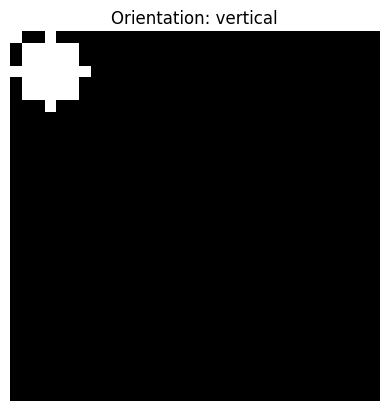

In [ ]:
def draw_shapes(image, shapes, orientation="horizontal"):
    """Draw the given shapes on the image with specified orientation."""
    offsets = {"horizontal": (0, 0), "vertical": (0, 0)}
    
    for shape in shapes:
        if shape == "diagonal":
            length = 5
            for i in range(length):
                image[offsets[orientation][0] + i, offsets[orientation][1] + i] = 1
            offsets[orientation] += (length + 2, length + 2)
        
        elif shape == "x":
            length = 5
            for i in range(length):
                image[offsets[orientation][0] + i, offsets[orientation][1] + i] = 1
                image[offsets[orientation][0] + i, offsets[orientation][1] + length - 1 - i] = 1
            offsets[orientation] += (length + 2, length + 2)
        
        elif shape == "circle":
            radius = 3
            center = (offsets[orientation][0] + radius, offsets[orientation][1] + radius)
            for r in range(image.shape[0]):
                for c in range(image.shape[1]):
                    if (r - center[0])**2 + (c - center[1])**2 <= radius**2:
                        image[r, c] = 1
            offsets[orientation] += (2 * radius + 2, 2 * radius + 2)
    
    return image

# Create a blank 32x32 image
img = np.zeros((32, 32))

# Randomly choose two shapes and an orientation
chosen_shapes = np.random.choice(["diagonal", "x", "circle"], 2, replace=False)
chosen_orientation = np.random.choice(["horizontal", "vertical"])

# Draw the shapes on the image
draw_shapes(img, chosen_shapes, chosen_orientation)

# Display the result
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"Orientation: {chosen_orientation}")
plt.show()


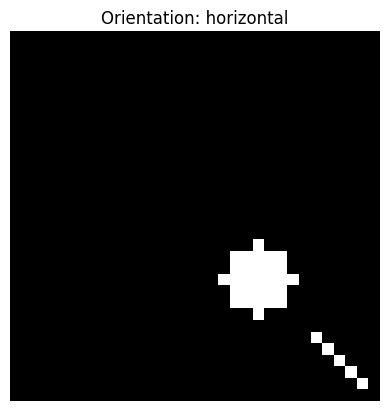

In [ ]:
def draw_shapes_constrained(image, shapes, orientation="horizontal"):
    """Draw the given shapes on the image with specified orientation ensuring they fit."""
    max_dim = {"horizontal": image.shape[1], "vertical": image.shape[0]}
    offsets = {"horizontal": (3, 3), "vertical": (0, 0)}
    
    # Calculate required space based on chosen shapes and orientation
    required_space = sum([5 if s in ["diagonal", "x"] else 2*3 for s in shapes]) + (len(shapes) - 1) * 2
    
    # Calculate starting position based on available space
    start_pos = np.random.randint(0, max_dim[orientation] - required_space + 1)
    offsets[orientation] = (start_pos, start_pos)
    
    for shape in shapes:
        if shape == "diagonal":
            length = 5
            for i in range(length):
                image[offsets[orientation][0] + i, offsets[orientation][1] + i] = 1
            offsets[orientation] = tuple(sum(x) for x in zip(offsets[orientation], (length + 2, length + 2)))
        
        elif shape == "x":
            length = 5
            for i in range(length):
                image[offsets[orientation][0] + i, offsets[orientation][1] + i] = 1
                image[offsets[orientation][0] + i, offsets[orientation][1] + length - 1 - i] = 1
            offsets[orientation] = tuple(sum(x) for x in zip(offsets[orientation], (length + 2, length + 2)))
        
        elif shape == "circle":
            radius = 3
            center = (offsets[orientation][0] + radius, offsets[orientation][1] + radius)
            for r in range(image.shape[0]):
                for c in range(image.shape[1]):
                    if (r - center[0])**2 + (c - center[1])**2 <= radius**2:
                        image[r, c] = 1
            offsets[orientation] = tuple(sum(x) for x in zip(offsets[orientation], (2 * radius + 2, 2 * radius + 2)))
    
    return image

# Create a blank 32x32 image
img_constrained = np.zeros((32, 32))

chosen_orientation = 'horizontal'
# Draw the shapes on the image ensuring they fit within bounds
draw_shapes_constrained(img_constrained, chosen_shapes, chosen_orientation)

# Display the result
plt.imshow(img_constrained, cmap='gray')
plt.axis('off')
plt.title(f"Orientation: {chosen_orientation}")
plt.show()